# Personal Medical Cost Prediction

This project has the objective to demonstrate the use of different models of machine learning to predict personal Medical Cost

The dataset used in this project was the ["Medical Cost Personal Datasets"](https://www.kaggle.com/mirichoi0218/insurance)

# Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Data

In [2]:
data = pd.read_csv('insurance.csv')

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data description

In [3]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Data understanding

### Features - Smoker

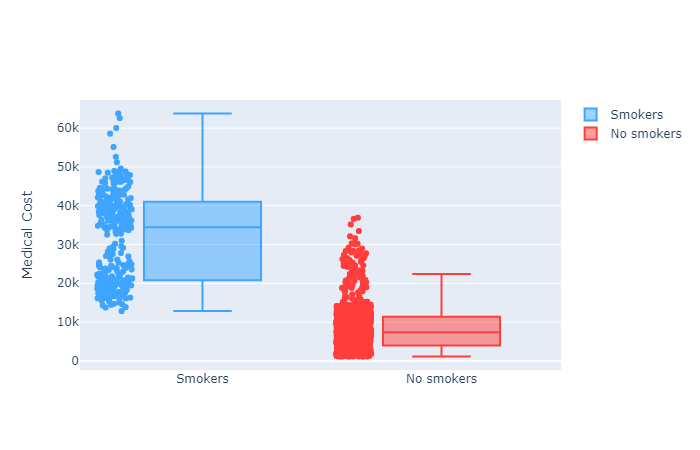

In [4]:
fig_smoker = go.Figure()

fig_smoker.add_trace(go.Box(y=data[data['smoker']=='yes']['charges'], boxpoints='all', 
                            marker_color = '#3da4ff', name='Smokers'))

fig_smoker.add_trace(go.Box(y=data[data['smoker']=='no']['charges'], boxpoints='all', 
                            marker_color = '#ff3e3b', name='No smokers'))

fig_smoker.update_layout(yaxis_title='Medical Cost', width=750, height=600)

fig_smoker.show('png')

### Features - Sex

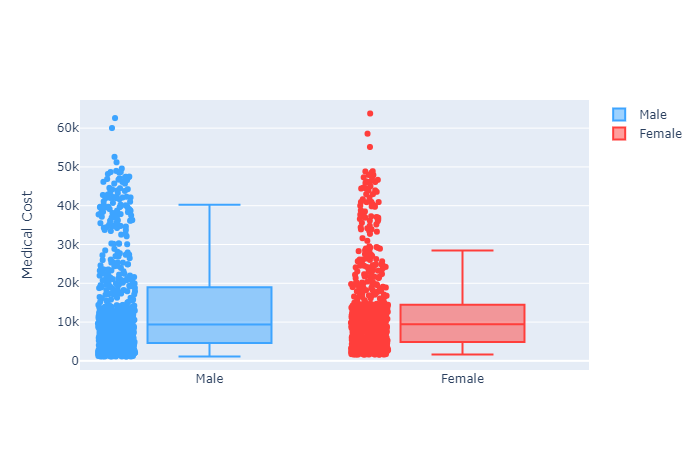

In [5]:
fig_sex = go.Figure()

fig_sex.add_trace(go.Box(y=data[data['sex']=='male']['charges'], boxpoints='all', 
                            marker_color = '#3da4ff', name='Male'))

fig_sex.add_trace(go.Box(y=data[data['sex']=='female']['charges'], boxpoints='all', 
                            marker_color = '#ff3e3b', name='Female'))

fig_sex.update_layout(yaxis_title='Medical Cost', width=750, height=600)

fig_sex.show('png')

### Features - Region

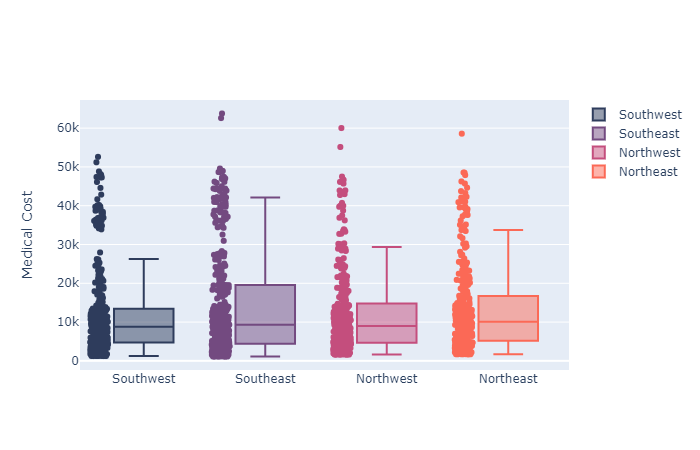

In [6]:
fig_region = go.Figure()

fig_region.add_trace(go.Box(y=data[data['region']=='southwest']['charges'], boxpoints='all', 
                            marker_color = '#2e3c5c', name='Southwest'))

fig_region.add_trace(go.Box(y=data[data['region']=='southeast']['charges'], boxpoints='all', 
                            marker_color = '#734a80', name='Southeast'))

fig_region.add_trace(go.Box(y=data[data['region']=='northwest']['charges'], boxpoints='all', 
                            marker_color = '#c44e7d', name='Northwest'))

fig_region.add_trace(go.Box(y=data[data['region']=='northeast']['charges'], boxpoints='all', 
                            marker_color = '#fb6956', name='Northeast'))

fig_region.update_layout(yaxis_title='Medical Cost', width=750, height=600)

fig_region.show('png')

### Features - BMI

##### BMI standard weight status categories

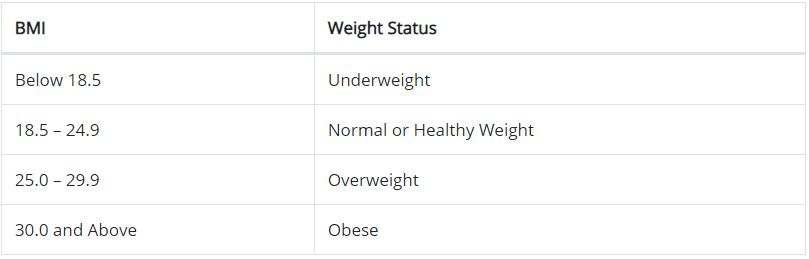

##### Creating categories

In [7]:
underweight = data[data['bmi'] <= 18.5]
normal = data[(data['bmi'] > 18.5) & (data['bmi'] <= 24.9)]
overweight = data[(data['bmi'] >= 25) & (data['bmi'] <= 29.9)]
obese = data[data['bmi'] >= 30]

##### BMI boxplot

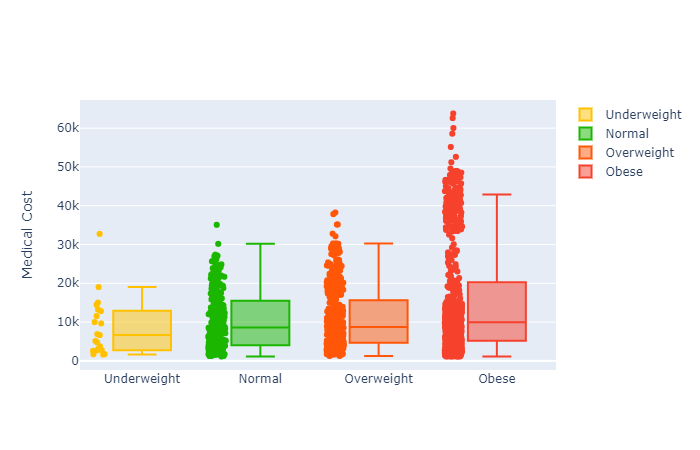

In [8]:
fig_bmi = go.Figure()

fig_bmi.add_trace(go.Box(y=underweight['charges'], boxpoints='all', 
                            marker_color = '#FFC100', name='Underweight'))

fig_bmi.add_trace(go.Box(y=normal['charges'], boxpoints='all', 
                            marker_color = '#1AB600', name='Normal'))

fig_bmi.add_trace(go.Box(y=overweight['charges'], boxpoints='all', 
                            marker_color = '#FF5607', name='Overweight'))

fig_bmi.add_trace(go.Box(y=obese['charges'], boxpoints='all', 
                            marker_color = '#F6412D', name='Obese'))

fig_bmi.update_layout(yaxis_title='Medical Cost', width=750, height=600)

fig_bmi.show('png')

##### BMI distribution

<AxesSubplot:xlabel='bmi'>

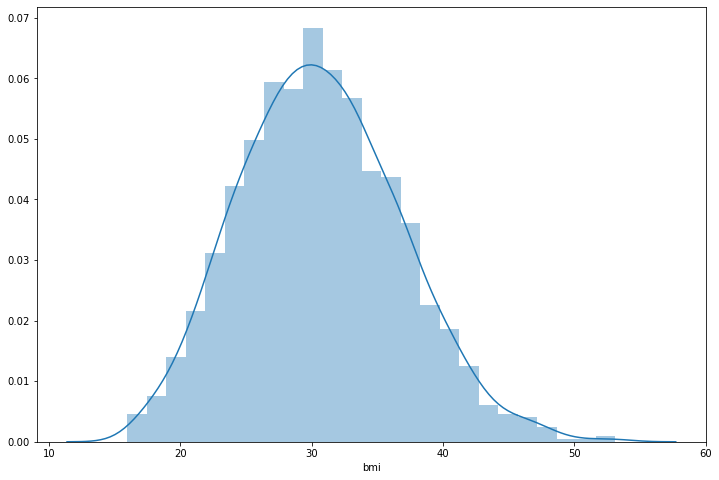

In [9]:
plt.figure(figsize=(12, 8))

sns.distplot(data['bmi'])

### Features - Medical cost

##### Medical cost distribution

<AxesSubplot:xlabel='charges'>

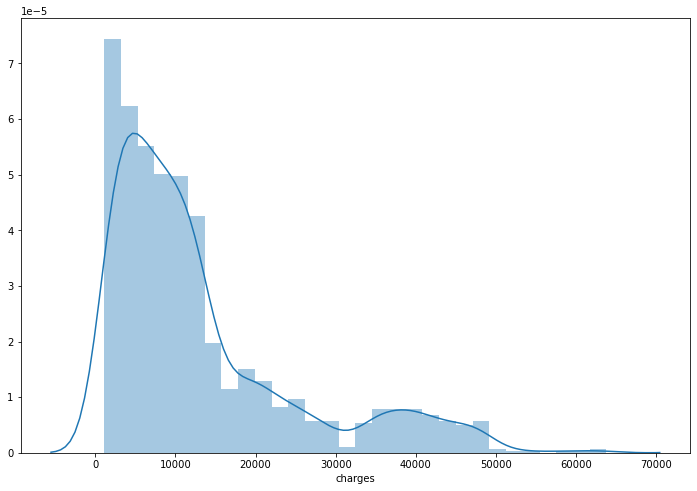

In [10]:
plt.figure(figsize=(12, 8))

sns.distplot(data['charges'])

# Data preparation

### Checking for null values

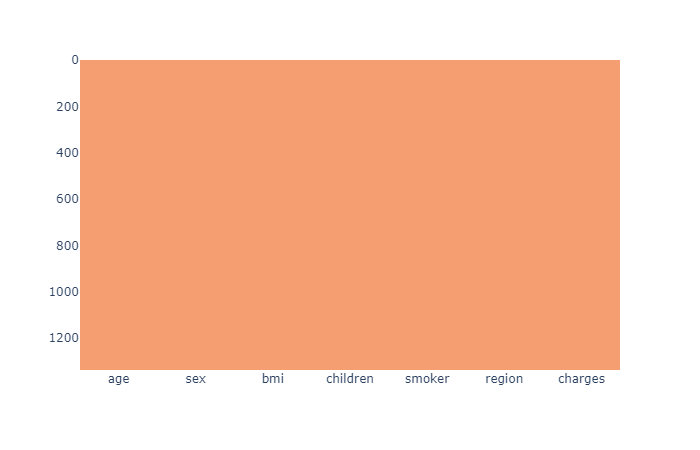

In [11]:
fig_null_values = px.imshow(data.isnull(),color_continuous_scale='peach')

fig_null_values.update_layout(width=750, height=600, coloraxis_showscale=False)

fig_null_values.show('png')

### Enconding data

In [12]:
encoder = LabelEncoder()

data['region']  = encoder.fit_transform(data['region'])

data['smoker']  = encoder.fit_transform(data['smoker'])

data['sex']  = encoder.fit_transform(data['sex'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Checking features correlation

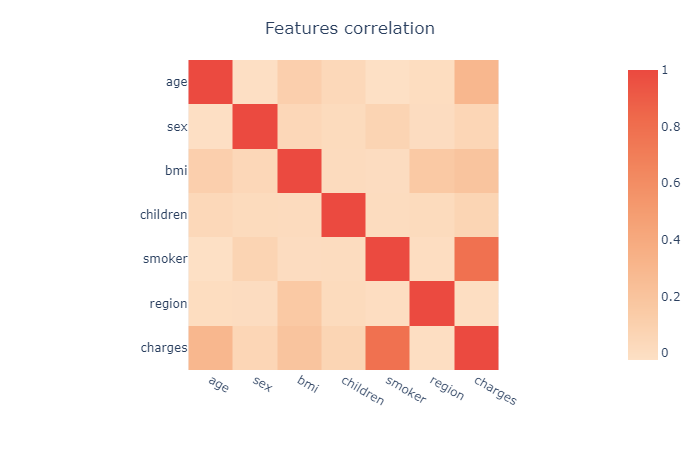

In [13]:
fig_corr = px.imshow(data.corr(), color_continuous_scale='peach')

fig_corr.update_layout(title={
        'text': "Features correlation",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width=750, height=600)

fig_corr.show('png')

### Transforming target

##### Comparing Medical Cost x Log Medical Cost

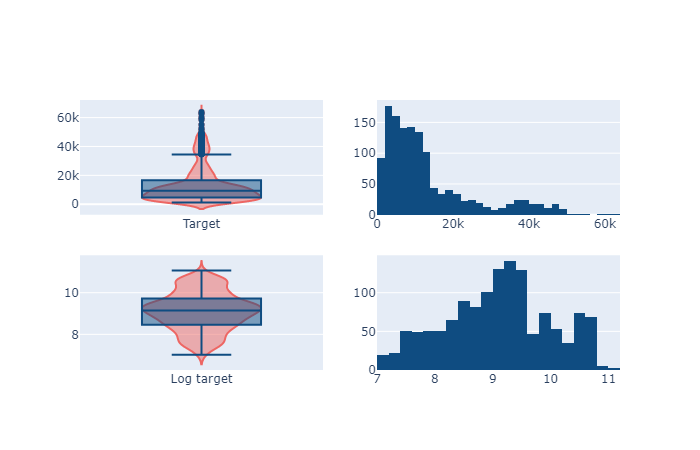

In [14]:
fig = make_subplots(rows=2, cols=2)


fig.add_trace(go.Violin(y=data['charges'], name='Target', marker_color='#ed6663'), row=1, col=1)
fig.add_trace(go.Box(y=data['charges'], name='Target', marker_color='#0f4c81'), row=1, col=1)
fig.add_trace(go.Histogram(x=data['charges'], name='Target', marker_color='#0f4c81'), row=1, col=2)


fig.add_trace(go.Violin(y=np.log(data['charges']), name='Log target', marker_color='#ed6663'), row=2, col=1)
fig.add_trace(go.Box(y=np.log(data['charges']), name='Log target', marker_color='#0f4c81'), row=2, col=1)
fig.add_trace(go.Histogram(x=np.log(data['charges']), name='Log target', marker_color='#0f4c81'), row=2, col=2)


fig.update_layout(width=1000, height=850, showlegend=False)

fig.show('png')

##### Transforming medical cost

In [15]:
data['charges'] = np.log1p(data['charges'])

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455


### Defining variables

In [16]:
X = data.drop(['charges'], axis=1)

y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Selecting features

##### Mutual information filter

In [17]:
selector = SelectKBest(mutual_info_regression, k=5).fit(X_train, y_train)

X_train_filtered = selector.transform(X_train)
X_test_filtered = selector.transform(X_test)

selector.get_support()

array([ True,  True,  True,  True,  True, False])

# Models

### Linear regression model

##### Creating model

In [18]:
linear_regression = LinearRegression().fit(X_train_filtered, y_train)

y_pred = linear_regression.predict(X_test_filtered)

##### Evaluating model

In [19]:
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

linear_rsq = r2_score(y_test, y_pred)

linear_cv = cross_val_score(LinearRegression(), X, y, cv=5).mean()

print('CV Score:', linear_cv)

print('\nRMSE:', linear_rmse)

print('\nR²:', linear_rsq)

CV Score: 0.7633699711275975

RMSE: 0.43378701760305177

R²: 0.7679694899006777


##### Visualizing model

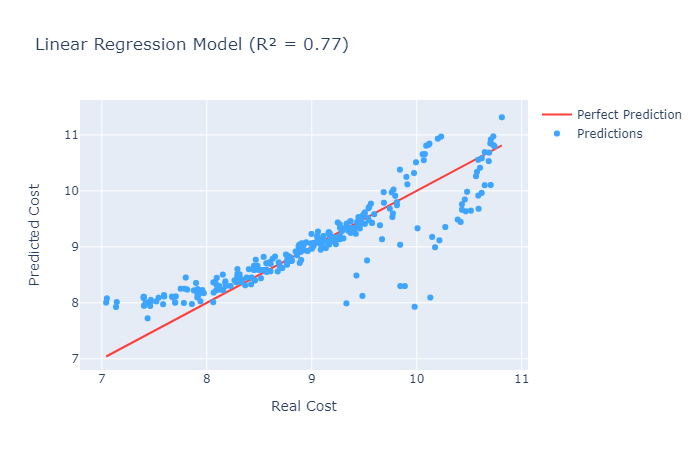

In [20]:
fig_prediction = go.Figure()

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_test, 
                                    marker_color='#ff3e3b', name='Perfect Prediction'))

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_pred, 
                                    marker_color='#3da4ff', mode='markers', name='Predictions'))

fig_prediction.update_layout(title=('Linear Regression Model (R² = %.2f)' %linear_rsq), 
                             xaxis_title='Real Cost', yaxis_title='Predicted Cost', 
                             width=700, height=550)

fig_prediction.show('png')

### Polynomial regression model

##### Creating model

In [21]:
polynomial_features = PolynomialFeatures(degree=3)

polynomial_features.fit(X_train_filtered)

X_train_poly = polynomial_features.transform(X_train_filtered)
X_test_poly = polynomial_features.transform(X_test_filtered)

X_poly = polynomial_features.fit_transform(X)

linear_regression = LinearRegression().fit(X_train_poly, y_train)

y_pred = linear_regression.predict(X_test_poly)

##### Evaluating model

In [22]:
polynomial_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

polynomial_rsq = r2_score(y_test, y_pred)

polynomial_cv = cross_val_score(LinearRegression(), X_poly, y, cv=5).mean()

print('CV Score:', polynomial_cv)

print('\nRMSE:', polynomial_rmse)

print('\nR²:', polynomial_rsq)

CV Score: 0.7353196919009577

RMSE: 0.361818676482357

R²: 0.8385738252663313


##### Visualizing model

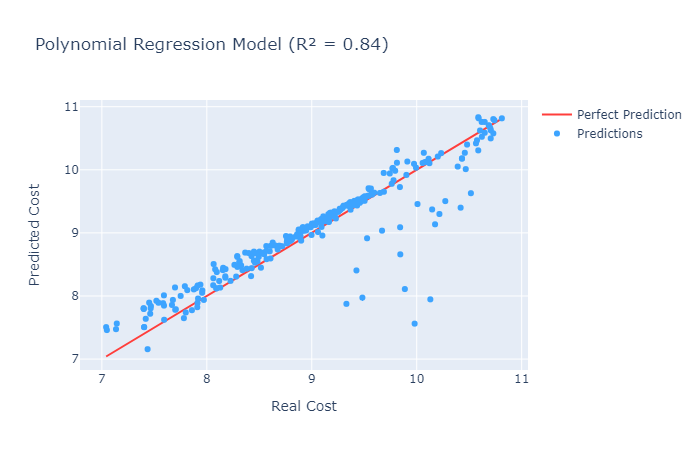

In [23]:
fig_prediction = go.Figure()

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_test, 
                                    marker_color='#ff3e3b', name='Perfect Prediction'))

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_pred, 
                                    marker_color='#3da4ff', mode='markers', name='Predictions'))

fig_prediction.update_layout(title=('Polynomial Regression Model (R² = %.2f)' %polynomial_rsq), xaxis_title='Real Cost', yaxis_title='Predicted Cost', 
                             width=700, height=550)

fig_prediction.show('png')

### Random forest regression model

##### Creating model

In [24]:
rfr = RandomForestRegressor(n_estimators = 10, max_depth=7, criterion = 'mse').fit(X_train_filtered, y_train)

y_pred = rfr.predict(X_test_filtered)

##### Evaluating model

In [25]:
rfr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rfr_rsq = r2_score(y_test, y_pred)

rfr_cv = cross_val_score(RandomForestRegressor(), X, y, cv=5).mean()

print('CV Score:', rfr_cv)

print('\nRMSE:', rfr_rmse)

print('\nR²:', rfr_rsq)

CV Score: 0.8054827128933256

RMSE: 0.3798988535828628

R²: 0.8220377203973683


##### Visualizing model

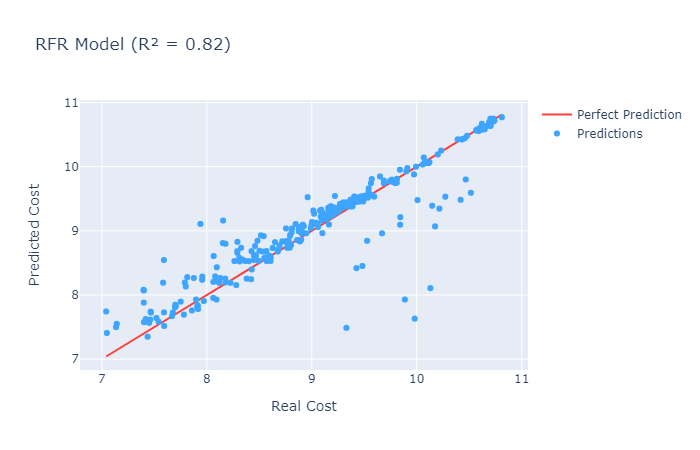

In [26]:
fig_prediction = go.Figure()

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_test, 
                                    marker_color='#ff3e3b', name='Perfect Prediction'))

fig_prediction.add_trace(go.Scatter(x=y_test, y=y_pred, 
                                    marker_color='#3da4ff', mode='markers', name='Predictions'))

fig_prediction.update_layout(title=('RFR Model (R² = %.2f)' %rfr_rsq), xaxis_title='Real Cost', yaxis_title='Predicted Cost', 
                             width=700, height=550)

fig_prediction.show('png')

# Comparing models

In [27]:
models = [('Linear Regression', linear_rsq, linear_rmse, linear_cv), 
          ('Polynomial Regression', polynomial_rsq, polynomial_rmse, polynomial_cv),
          ('Random Forest Regression', rfr_rsq, rfr_rmse, rfr_cv)]

model_comparasion = pd.DataFrame(models, columns=['Model', 'R²', 'RMSE', 'CV Score'])

model_comparasion.head()

,Model,R²,RMSE,CV Score
0,Linear Regression,0.767969,0.433787,0.763370
1,Polynomial Regression,0.838574,0.361819,0.735320
2,Random Forest Regression,0.822038,0.379899,0.805483
